In [7]:
import pandas as pd 
import cv2
import imutils 
import os 
from os import listdir
from matplotlib import pyplot as plt

In [14]:
csv_path='../dataset/train.csv'
image_dir='../dataset/Train Images/'
flip_dir='../dataset/train_flipped/'

In [3]:
labels=pd.read_csv(csv_path)
labels.head()

,Image,Class
0,image7042.jpg,Food
1,image3327.jpg,misc
2,image10335.jpg,Attire
3,image8019.jpg,Food
4,image2128.jpg,Attire


In [5]:
image_paths=[]
for file in listdir(image_dir):
    image_paths.append(image_dir+file)

In [1]:
flipped_labels=[]
for i in range(len(labels)):
    img=cv2.imread(image_dir+labels['Image'][i])
    img=cv2.flip(img,1)
    name=labels['Image'][i][:-4]
    flipped_labels.append([name+'_flip.jpg',labels['Class'][i]])
    cv2.imwrite(flip_dir+name+'_flip.jpg',img)
    
# for i in image_paths:
#     img=cv2.imread(i)
#     img=cv2.flip(img,1)
#     name=i.split('/')[-1][:-4]
#     cv2.imwrite(flip_dir+name+'_flip.jpg',img)

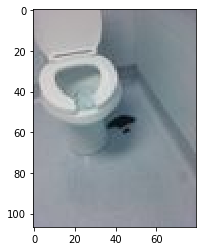

In [10]:
img=cv2.imread(image_paths[2])
plt.imshow(img)

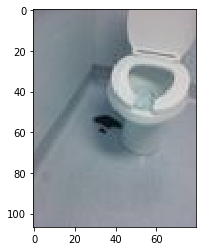

In [34]:
flipped_df=pd.DataFrame(flipped_labels, columns=labels.columns)

In [42]:
merged_df=labels.append(flipped_df)

In [43]:
merged_df.shape

(11966, 2)

In [44]:
merged_df.head()

,Image,Class
0,image7042.jpg,Food
1,image3327.jpg,misc
2,image10335.jpg,Attire
3,image8019.jpg,Food
4,image2128.jpg,Attire


In [45]:
merged_df.to_csv('../dataset/original_and_flipped.csv', index=False)

In [53]:
data=pd.read_csv('../dataset/original_and_flipped.csv')

In [54]:
data.shape

(11966, 2)

In [62]:
import random 
from sklearn.utils import shuffle


In [90]:
random.seed(9)
data=shuffle(data)
train=data.iloc[:10000,]
test=data.iloc[10000:,]
train.groupby(by=['Class']).count()

,Image
Class,
Attire,2809
Decorationandsignage,1241
Food,3854
misc,2096


,Image
Class,
Attire,2799
Decorationandsignage,1230
Food,3818
misc,2153


In [78]:
test.groupby(by=['Class']).count()

,Image
Class,
Attire,579
Decorationandsignage,220
Food,734
misc,433
